In [161]:
import os
import json

path="experiments"
results = []
for el in os.listdir(path):
    if el.endswith("json"):
        with open(path+"/"+el) as f:
            report = json.load(f)
            report["filename"] = el
            if "augment" not in report and 'cutout' in el:
                report["augment"] = "cutout"
            elif "augment" not in report:
                report["augment"] = "none"
            if "train" not in report:
                report["train"] = "standard"
            results.append(report)

import pandas as pd
res_df = pd.DataFrame.from_dict(results)
res_df["epochs"] = res_df["trajectory"].apply(len)
res_df

,name,run,best_accuracy_validation,time_generated,trajectory,filename,augment,train,epochs
0,vgg11_fat_classifier,10,0.8212,2023-03-16T08:35:47.751628,"[{'epoch': 0, 'train': 0.30733333333333335, 'v...",arch_vgg11fatclassifier_10_report.json,none,standard,28
1,vgg11_fat_classifier,1,0.8170,2023-03-16T06:56:18.770802,"[{'epoch': 0, 'train': 0.34771111111111114, 'v...",arch_vgg11fatclassifier_1_report.json,none,standard,23
2,vgg11_fat_classifier,2,0.8202,2023-03-16T07:06:36.186440,"[{'epoch': 0, 'train': 0.2871111111111111, 'va...",arch_vgg11fatclassifier_2_report.json,none,standard,30
3,vgg11_fat_classifier,3,0.8298,2023-03-16T07:18:59.518958,"[{'epoch': 0, 'train': 0.2554888888888889, 'va...",arch_vgg11fatclassifier_3_report.json,none,standard,36
4,vgg11_fat_classifier,4,0.8316,2023-03-16T07:32:13.924439,"[{'epoch': 0, 'train': 0.32711111111111113, 'v...",arch_vgg11fatclassifier_4_report.json,none,standard,39
...,...,...,...,...,...,...,...,...,...
393,vgg16,5,0.8624,2023-03-22T13:52:34.386980,"[{'epoch': 0, 'train': 0.2540222222222222, 'va...",train_weightdecay_aug_flip_arch_vgg16_5_report...,flip,weightdecay,32
394,vgg16,6,0.8632,2023-03-22T14:11:56.323451,"[{'epoch': 0, 'train': 0.2291111111111111, 'va...",train_weightdecay_aug_flip_arch_vgg16_6_report...,flip,weightdecay,27
395,vgg16,7,0.8704,2023-03-22T14:36:52.058999,"[{'epoch': 0, 'train': 0.27566666666666667, 'v...",train_weightdecay_aug_flip_arch_vgg16_7_report...,flip,weightdecay,30
396,vgg16,8,0.8458,2023-03-22T14:54:35.994257,"[{'epoch': 0, 'train': 0.27744444444444444, 'v...",train_weightdecay_aug_flip_arch_vgg16_8_report...,flip,weightdecay,20


In [162]:
top10_models = res_df.sort_values("best_accuracy_validation", ascending=False).head(10)
top5_models = res_df.sort_values("best_accuracy_validation", ascending=False).head(5)

In [163]:
res_df

,name,run,best_accuracy_validation,time_generated,trajectory,filename,augment,train,epochs
0,vgg11_fat_classifier,10,0.8212,2023-03-16T08:35:47.751628,"[{'epoch': 0, 'train': 0.30733333333333335, 'v...",arch_vgg11fatclassifier_10_report.json,none,standard,28
1,vgg11_fat_classifier,1,0.8170,2023-03-16T06:56:18.770802,"[{'epoch': 0, 'train': 0.34771111111111114, 'v...",arch_vgg11fatclassifier_1_report.json,none,standard,23
2,vgg11_fat_classifier,2,0.8202,2023-03-16T07:06:36.186440,"[{'epoch': 0, 'train': 0.2871111111111111, 'va...",arch_vgg11fatclassifier_2_report.json,none,standard,30
3,vgg11_fat_classifier,3,0.8298,2023-03-16T07:18:59.518958,"[{'epoch': 0, 'train': 0.2554888888888889, 'va...",arch_vgg11fatclassifier_3_report.json,none,standard,36
4,vgg11_fat_classifier,4,0.8316,2023-03-16T07:32:13.924439,"[{'epoch': 0, 'train': 0.32711111111111113, 'v...",arch_vgg11fatclassifier_4_report.json,none,standard,39
...,...,...,...,...,...,...,...,...,...
393,vgg16,5,0.8624,2023-03-22T13:52:34.386980,"[{'epoch': 0, 'train': 0.2540222222222222, 'va...",train_weightdecay_aug_flip_arch_vgg16_5_report...,flip,weightdecay,32
394,vgg16,6,0.8632,2023-03-22T14:11:56.323451,"[{'epoch': 0, 'train': 0.2291111111111111, 'va...",train_weightdecay_aug_flip_arch_vgg16_6_report...,flip,weightdecay,27
395,vgg16,7,0.8704,2023-03-22T14:36:52.058999,"[{'epoch': 0, 'train': 0.27566666666666667, 'v...",train_weightdecay_aug_flip_arch_vgg16_7_report...,flip,weightdecay,30
396,vgg16,8,0.8458,2023-03-22T14:54:35.994257,"[{'epoch': 0, 'train': 0.27744444444444444, 'v...",train_weightdecay_aug_flip_arch_vgg16_8_report...,flip,weightdecay,20


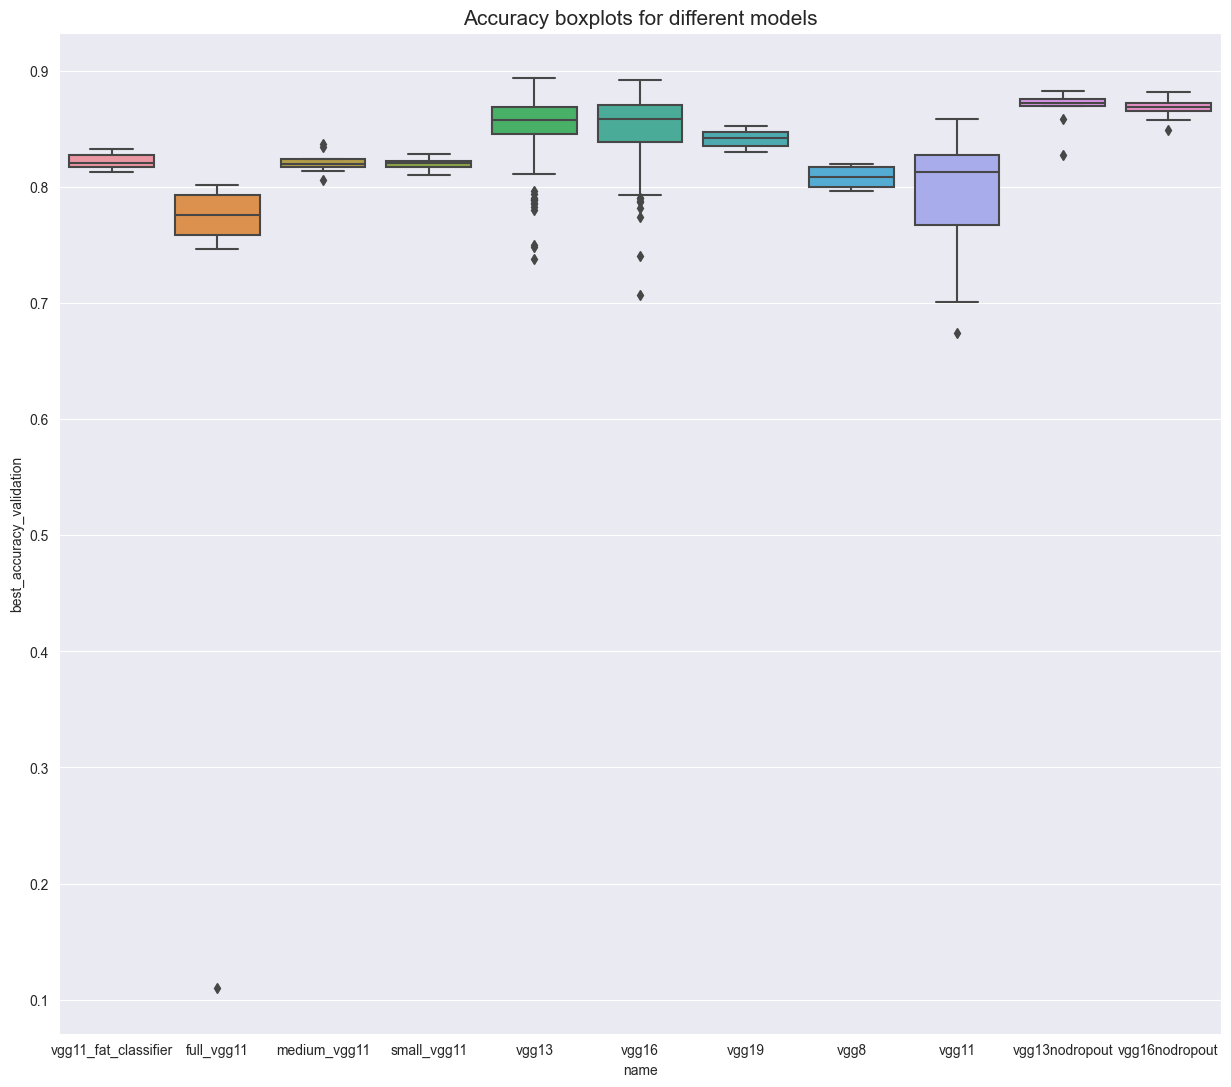

In [164]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,13))
sns.boxplot(y="best_accuracy_validation", x = "name", data= res_df)
plt.title("Accuracy boxplots for different models", fontsize=15)
plt.show()

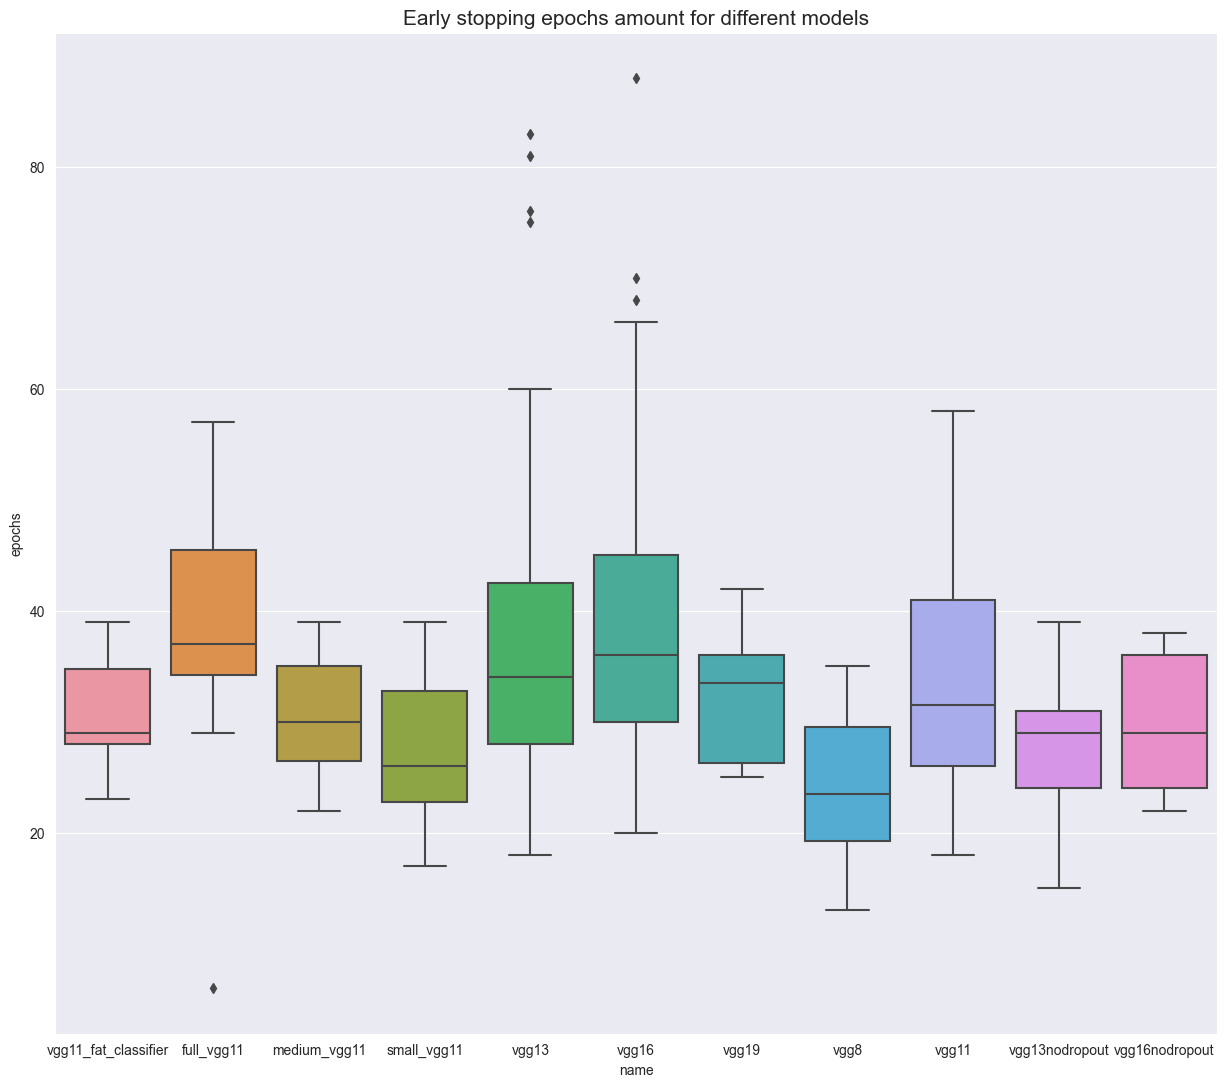

In [165]:
plt.figure(figsize=(15,13))
sns.boxplot(y="epochs", x = "name", data= res_df)
plt.title("Early stopping epochs amount for different models", fontsize=15)
plt.show()

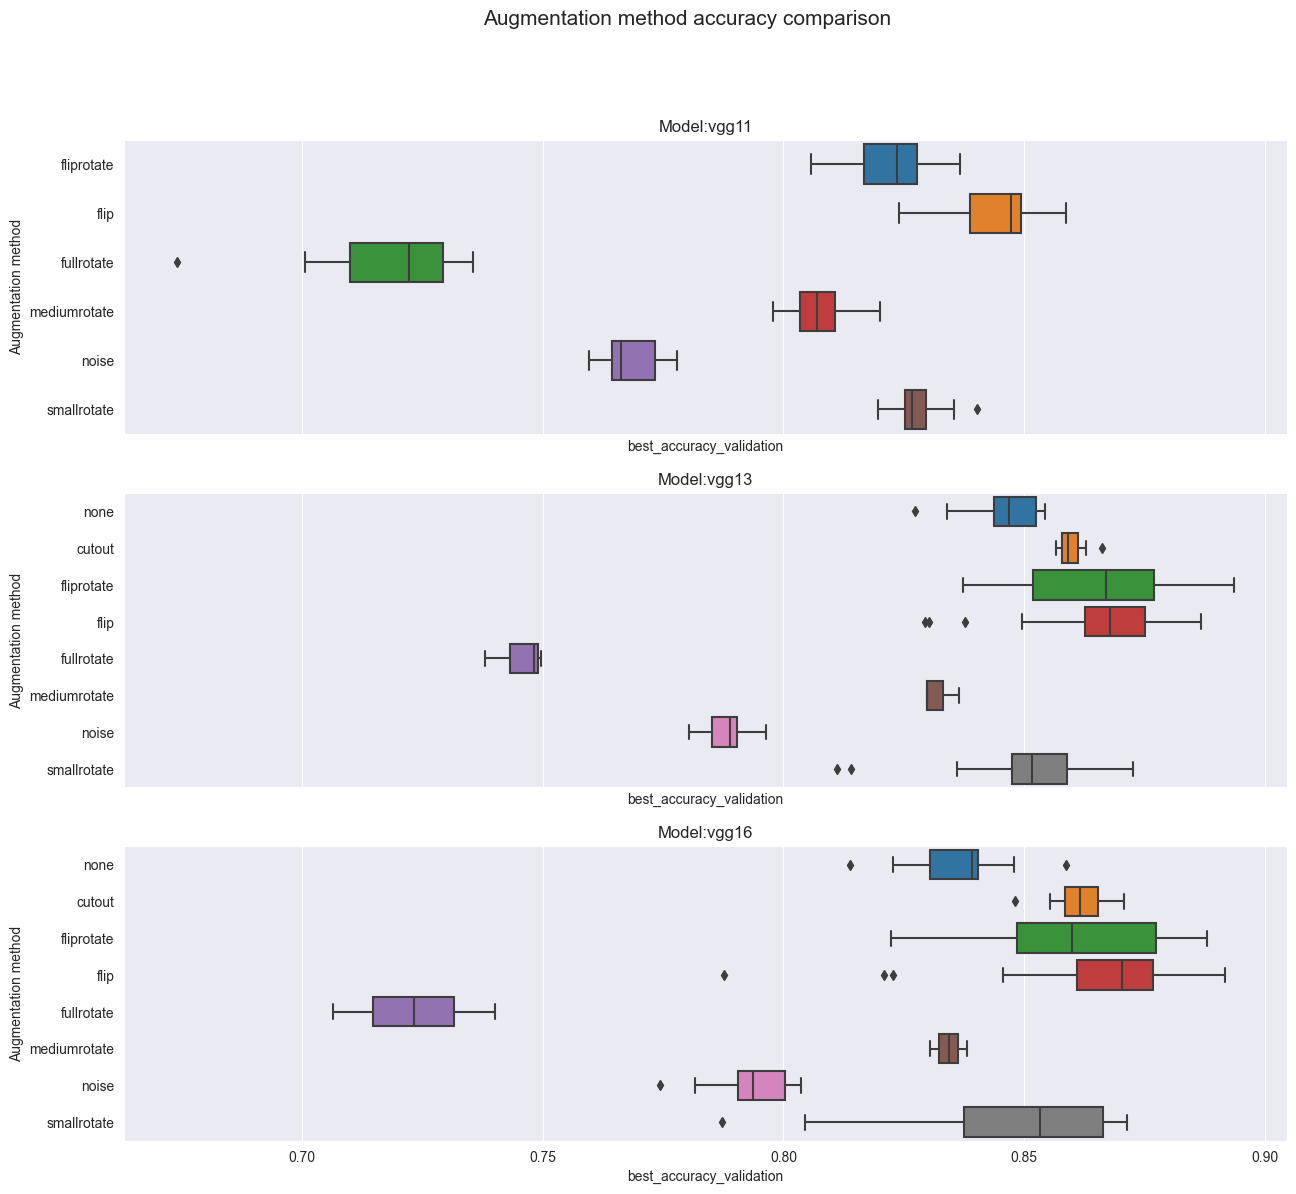

In [166]:
fig, ax = plt.subplots(3, 1, figsize=(15,13), sharex='col')
fig.suptitle("Augmentation method accuracy comparison", fontsize=15)
for i, name in enumerate(["vgg11", "vgg13", "vgg16"]):
    sns.boxplot(y="augment", x="best_accuracy_validation", data=res_df.loc[res_df['name'] == name], ax=ax[i])
    ax[i].title.set_text('Model:{}'.format(name))
    ax[i].set_ylabel("Augmentation method")
plt.show()

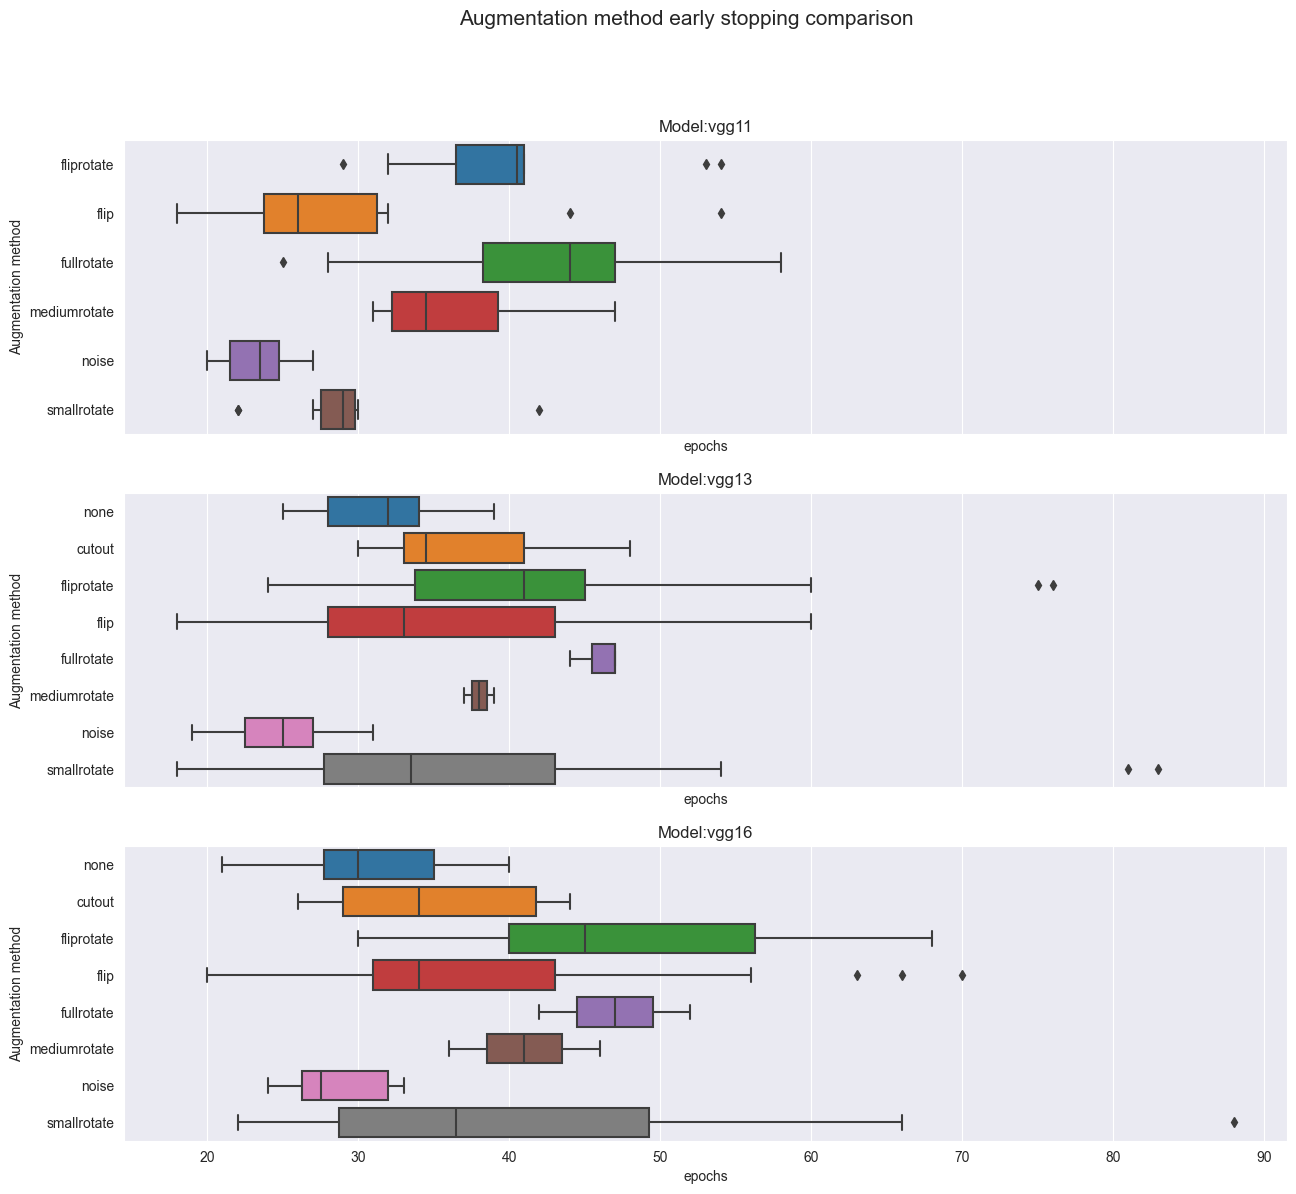

In [167]:
fig, ax = plt.subplots(3, 1, figsize=(15,13), sharex='col')
fig.suptitle("Augmentation method early stopping comparison", fontsize=15)
for i, name in enumerate(["vgg11", "vgg13", "vgg16"]):
    sns.boxplot(y="augment", x="epochs", data=res_df.loc[res_df['name'] == name], ax=ax[i])
    ax[i].title.set_text('Model:{}'.format(name))
    ax[i].set_ylabel("Augmentation method")
plt.show()

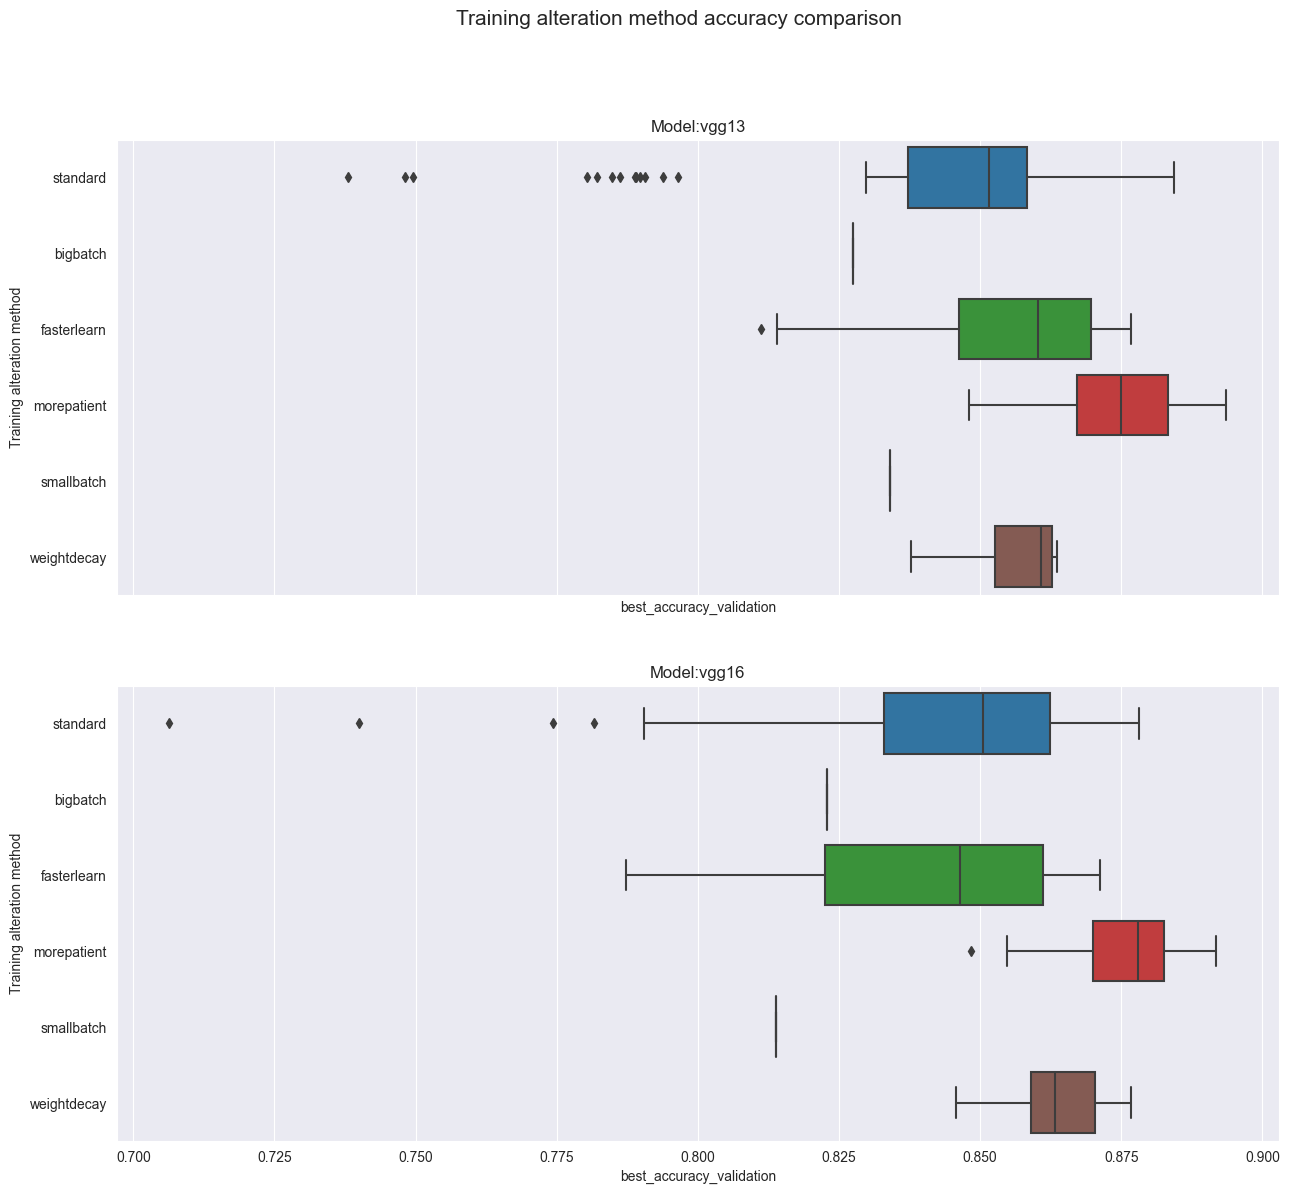

In [168]:
fig, ax = plt.subplots(2, 1, figsize=(15,13), sharex='col')
fig.suptitle("Training alteration method accuracy comparison", fontsize=15)
for i, name in enumerate(["vgg13", "vgg16"]):
    sns.boxplot(y="train", x="best_accuracy_validation", data=res_df.loc[res_df['name'] == name], ax=ax[i])
    ax[i].title.set_text('Model:{}'.format(name))
    ax[i].set_ylabel("Training alteration method")
plt.show()

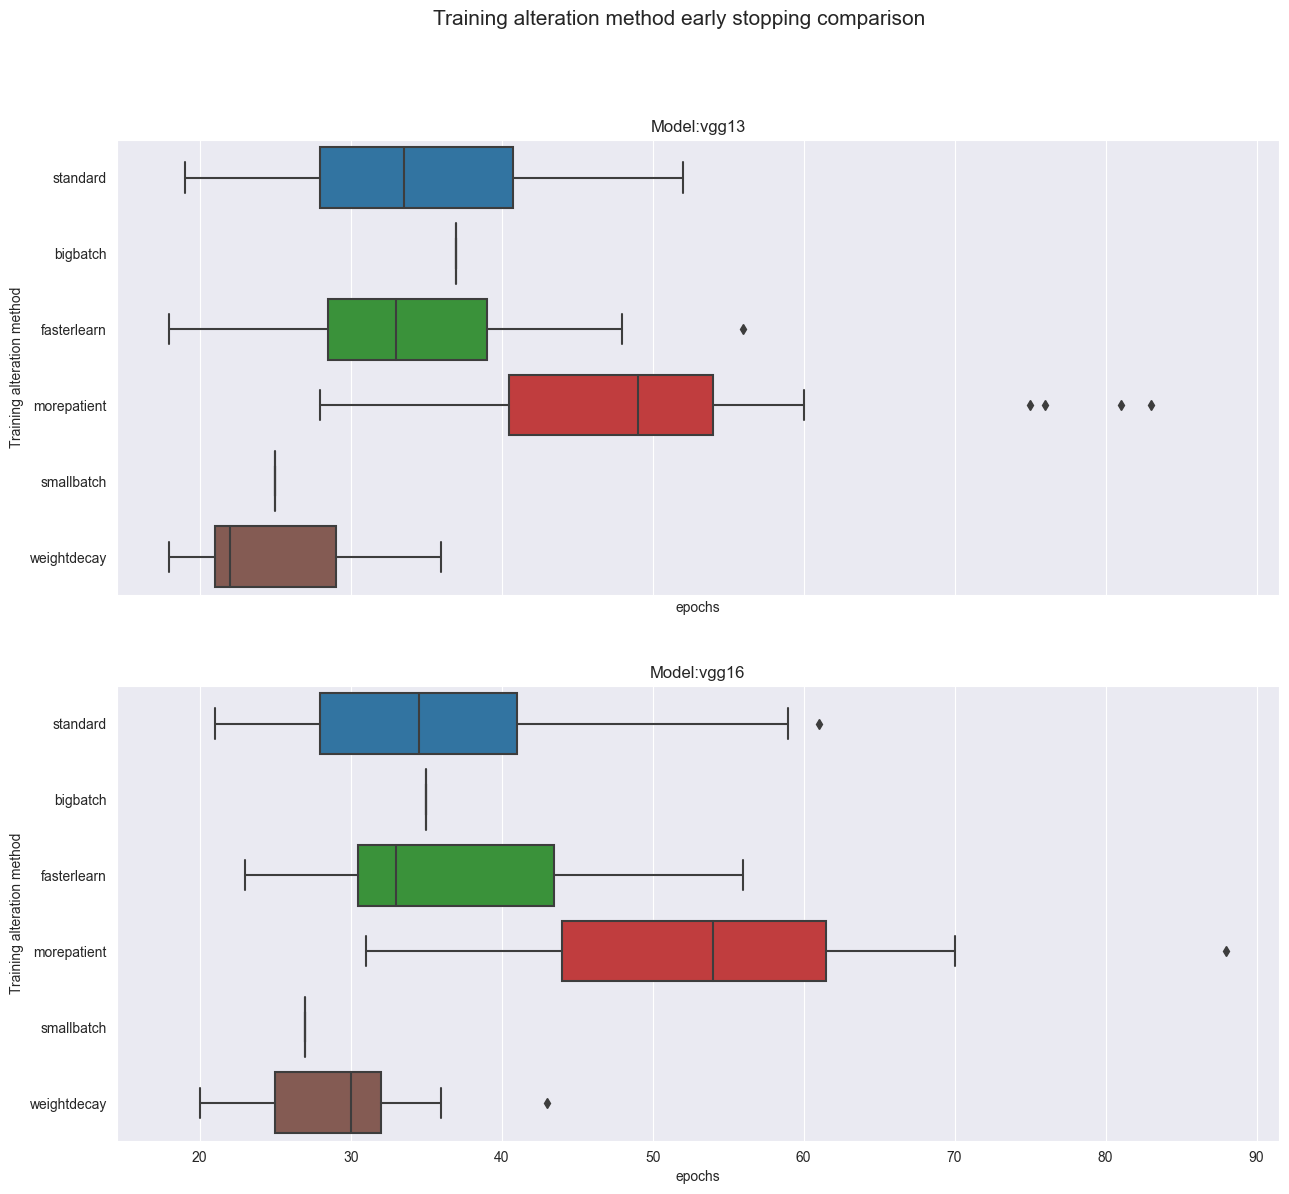

In [169]:
fig, ax = plt.subplots(2, 1, figsize=(15, 13), sharex='col')
fig.suptitle("Training alteration method early stopping comparison", fontsize=15)
for i, name in enumerate(["vgg13", "vgg16"]):
    sns.boxplot(y="train", x="epochs", data=res_df.loc[res_df['name'] == name], ax=ax[i])
    ax[i].title.set_text('Model:{}'.format(name))
    ax[i].set_ylabel("Training alteration method")
plt.show()

In [170]:
def plot_best_trajectories(df, title, legend_title):
    n = len(df)
    validation_values = [[] for i in range(n)]
    for i in range(n):
        for j in range(len(df['trajectory'].iloc[i])):
            validation_values[i].append(df['trajectory'].iloc[i][j]['train'])
    if "augment" in title:
        names = [df.iloc[i]['augment'] for i in range(n)]
    elif "train" in title:
        names = [df.iloc[i]['train'] for i in range(n)]
    else:
        names = [df.iloc[i]['name'] + '_' + df.iloc[i]['augment'] + '_' + df.iloc[i]['train'] for i in range(n)]
    cols = ['red', 'blue', 'green', 'grey', 'yellow', 'brown', 'purple', 'black']
    cols = cols[:n+1]
    fig, ax = plt.subplots(figsize=(15,13))
    for i in range(n):
        ax.plot([i for i in range(len(validation_values[i]))], validation_values[i], color=cols[i], linewidth=2, label=names[i])
    plt.legend(title=legend_title)
    plt.title(title, fontsize=15)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

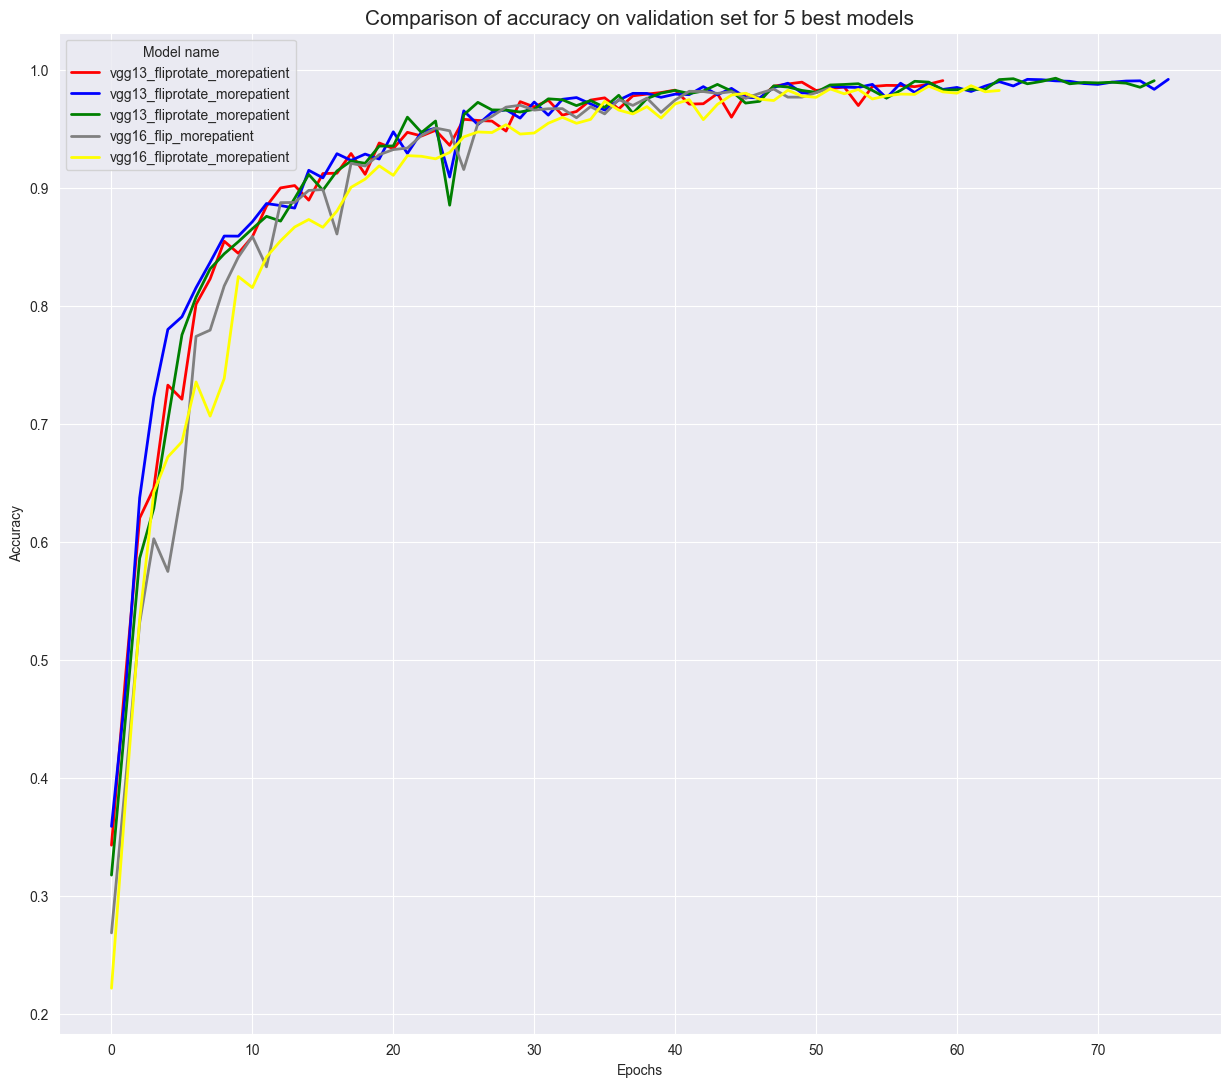

In [171]:
plot_best_trajectories(top5_models, "Comparison of accuracy on validation set for 5 best models", "Model name")

In [172]:
res_df['max_augment'] = res_df.groupby('augment')['best_accuracy_validation'].transform('max')
res_df['max_train'] = res_df.groupby('train')['best_accuracy_validation'].transform('max')

In [173]:
best_augment = res_df[res_df['best_accuracy_validation'].isin(res_df['max_augment'])].drop_duplicates('augment')
best_train = res_df[res_df['best_accuracy_validation'].isin(res_df['max_train'])].drop_duplicates('train')

In [174]:
res_df.groupby('augment')['best_accuracy_validation'].max()

augment
cutout          0.8708
flip            0.8918
fliprotate      0.8936
fullrotate      0.7496
mediumrotate    0.8382
noise           0.8036
none            0.8588
smallrotate     0.8726
Name: best_accuracy_validation, dtype: float64

In [175]:
res_df.groupby('train')['best_accuracy_validation'].max()

train
bigbatch       0.8274
fasterlearn    0.8768
morepatient    0.8936
smallbatch     0.8340
standard       0.8844
weightdecay    0.8768
Name: best_accuracy_validation, dtype: float64

In [176]:
best_train

,name,run,best_accuracy_validation,time_generated,trajectory,filename,augment,train,epochs,max_augment,max_train
144,vgg13,4,0.8844,2023-03-19T12:14:52.600581,"[{'epoch': 0, 'train': 0.3201111111111111, 'va...",aug_flip_arch_vgg13_4_report.json,flip,standard,43,0.8918,0.8844
250,vgg13,1,0.8274,2023-03-22T06:22:21.265630,"[{'epoch': 0, 'train': 0.14753333333333332, 'v...",train_bigbatch_aug_none_arch_vgg13_1_report.json,none,bigbatch,37,0.8588,0.8274
256,vgg13,5,0.8768,2023-03-21T09:57:23.246598,"[{'epoch': 0, 'train': 0.2147777777777778, 'va...",train_fasterlearn_aug_fliprotate_arch_vgg13_5_...,fliprotate,fasterlearn,42,0.8936,0.8768
307,vgg13,2,0.8936,2023-03-20T21:04:57.084226,"[{'epoch': 0, 'train': 0.3589333333333333, 'va...",train_morepatient_aug_fliprotate_arch_vgg13_2_...,fliprotate,morepatient,76,0.8936,0.8936
360,vgg13,1,0.8340,2023-03-22T06:11:44.529047,"[{'epoch': 0, 'train': 0.28924444444444447, 'v...",train_smallbatch_aug_none_arch_vgg13_1_report....,none,smallbatch,25,0.8588,0.8340
397,vgg16,9,0.8768,2023-03-22T15:25:28.386733,"[{'epoch': 0, 'train': 0.2597777777777778, 'va...",train_weightdecay_aug_flip_arch_vgg16_9_report...,flip,weightdecay,43,0.8918,0.8768


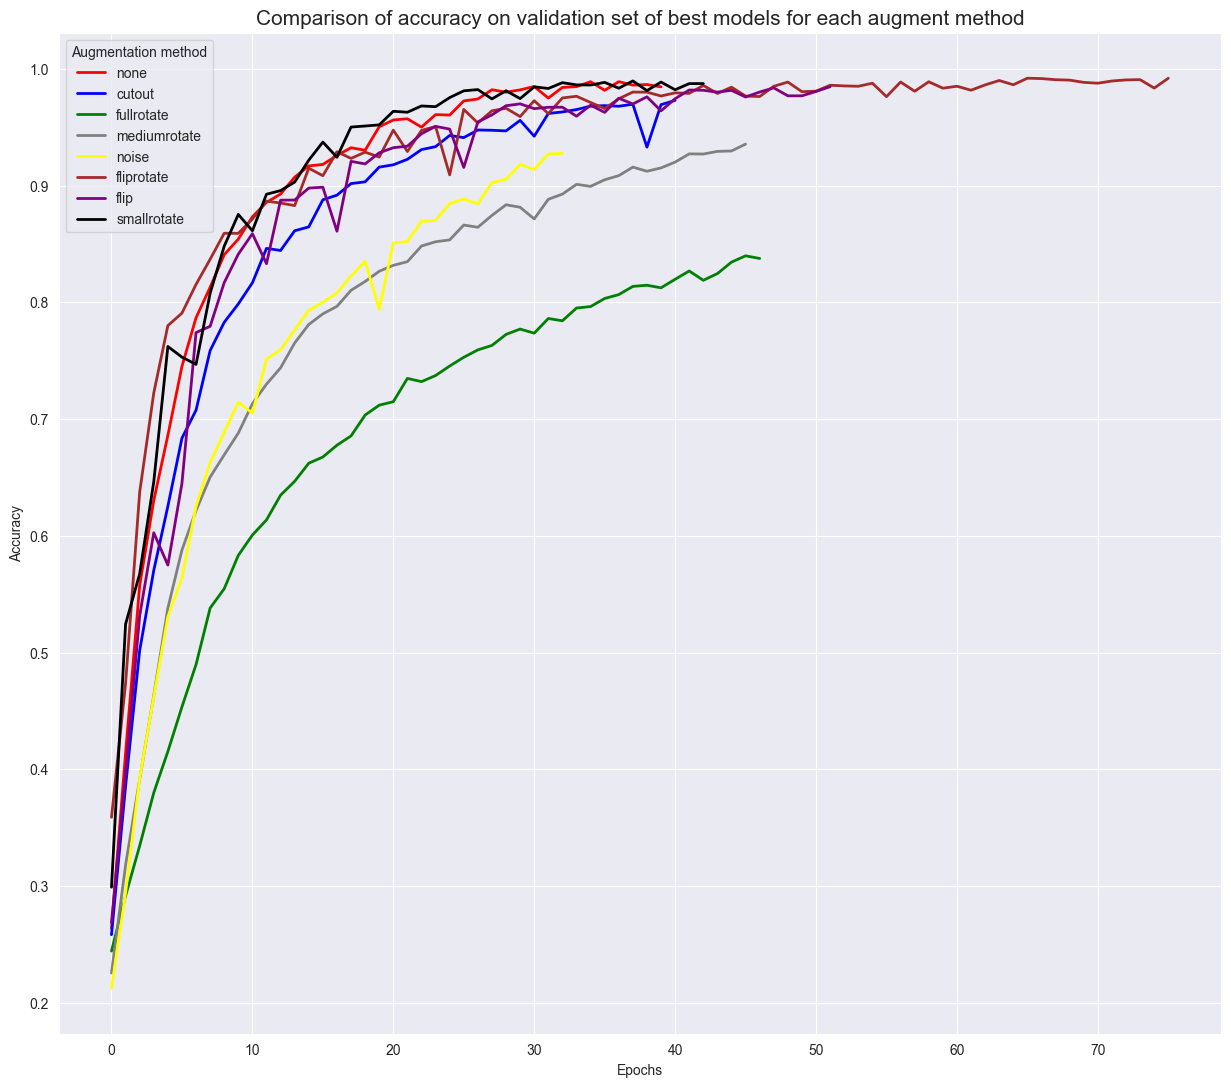

In [177]:
plot_best_trajectories(best_augment, "Comparison of accuracy on validation set of best models for each augment method", "Augmentation method")

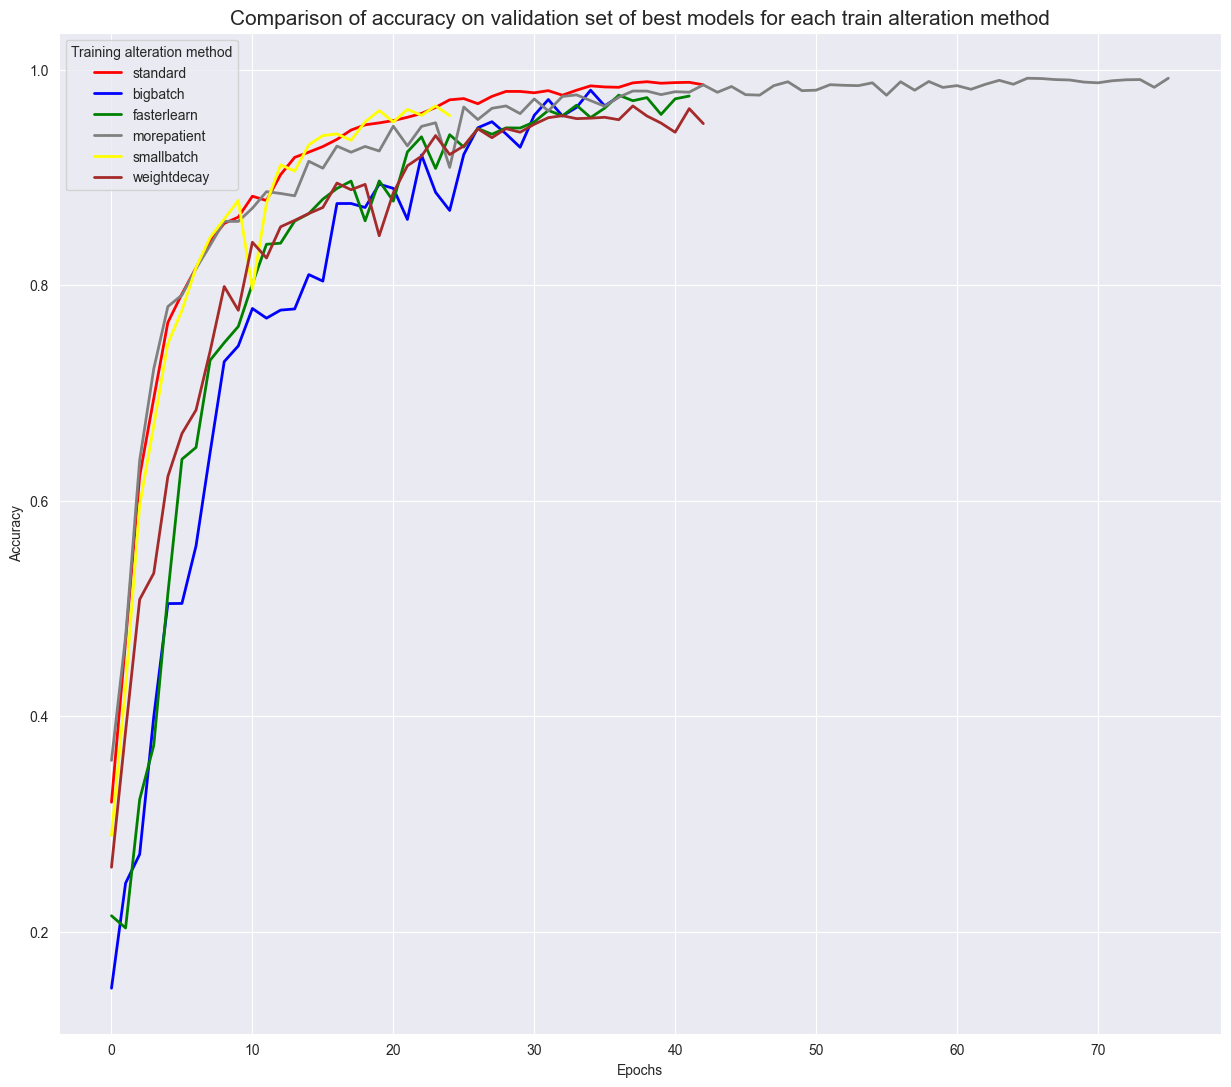

In [178]:
plot_best_trajectories(best_train, "Comparison of accuracy on validation set of best models for each train alteration method", "Training alteration method")